# WeatherPy
----

In [1]:
#T Bradford 
#June 2021

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from config import api_key
from citipy import citipy

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#lists for holding lat_lngs and cities
lat_lngs = []
cities = []

#create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#identify nearest city to each location
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#add to city list if unique
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

603

## Perform API Calls


In [3]:
#define base url
url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&'

#construct query url
query_url = f'{url}appid={api_key}&q='

#create dictionary to store data
cities_weather_data = {'City': [], 'Latitude': [], 'Longitude': [], 'Max Temperature': [], 'Humidity': [], 'Cloudiness': [], 'Wind Speed': [], 'Country': [], 'Date': []}

print('------------------------------\nBeginning Data Retrieval\n------------------------------')

#make api calls
i = 1
j = 1
for city in cities:
    city_name = city
    cities_weather = requests.get(query_url + city_name).json()    

#store found data into dictionary
    try:
        cities_weather_data['City'].append(cities_weather['name'])
        cities_weather_data['Latitude'].append(cities_weather['coord']['lat'])
        cities_weather_data['Longitude'].append(cities_weather['coord']['lon'])
        cities_weather_data['Max Temperature'].append(cities_weather['main']['temp_max'])
        cities_weather_data['Humidity'].append(cities_weather['main']['humidity'])
        cities_weather_data['Cloudiness'].append(cities_weather['clouds']['all'])
        cities_weather_data['Wind Speed'].append(cities_weather['wind']['speed'])
        cities_weather_data['Country'].append(cities_weather['sys']['country'])
        cities_weather_data['Date'].append(cities_weather['dt'])

        print('Processing Record {:>2} of Set {:>2} | {}'.format(i, j, city_name))

#skip locations for any missing data
    except:
        print('City data not found. Skipping...')
    pass
    
#delay for 65 seconds after every 50 calls    
    if i == 50:
        time.sleep(65)
        i = 0

#track number of call batches
        j += 1
    i += 1

else:
    print('------------------------------\nData Retrieval Complete\n------------------------------')

ing Record 23 of Set  3 | hearst
City data not found. Skipping...
Processing Record 25 of Set  3 | bengkulu
Processing Record 26 of Set  3 | muli
Processing Record 27 of Set  3 | laguna
Processing Record 28 of Set  3 | heze
City data not found. Skipping...
Processing Record 30 of Set  3 | constitucion
Processing Record 31 of Set  3 | colesberg
Processing Record 32 of Set  3 | oistins
Processing Record 33 of Set  3 | butaritari
Processing Record 34 of Set  3 | bethel
Processing Record 35 of Set  3 | angoche
City data not found. Skipping...
Processing Record 37 of Set  3 | astara
Processing Record 38 of Set  3 | pidhorodne
City data not found. Skipping...
Processing Record 40 of Set  3 | gamba
Processing Record 41 of Set  3 | comodoro rivadavia
Processing Record 42 of Set  3 | lagos
Processing Record 43 of Set  3 | mahebourg
Processing Record 44 of Set  3 | tubmanburg
Processing Record 45 of Set  3 | aldenhoven
City data not found. Skipping...
Processing Record 47 of Set  3 | arraial do 

## Convert Raw Data to DataFrame

In [4]:
#create dataframe from dictionary
cities_weather_df = pd.DataFrame(cities_weather_data, columns= ['City', 'Latitude', 'Longitude', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

#export to csv
cities_weather_df.to_csv ('output/citiesweather.csv', header=True)

#display preview
cities_weather_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,48.76,91,86,2.24,AU,1624321457
1,Salalah,17.0151,54.0924,78.89,94,90,5.75,OM,1624321457
2,Barrow,71.2906,-156.7887,41.02,75,1,9.22,US,1624321202
3,Atuona,-9.8000,-139.0333,79.21,76,2,12.28,PF,1624321384
4,Saskylakh,71.9167,114.0833,78.44,41,12,1.50,RU,1624321458


In [5]:
#display summary statistics
cities_weather_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,18.070920,16.136285,68.342941,69.210339,52.165775,7.243440,1.624322e+09
std,33.006924,89.773173,13.279375,22.035976,39.780953,4.929356,2.901097e+02
min,-54.800000,-179.166700,32.360000,6.000000,0.000000,0.000000,1.624321e+09
25%,-8.118100,-59.516700,59.250000,58.000000,8.000000,3.490000,1.624322e+09
50%,20.502200,19.961900,70.320000,75.000000,61.000000,5.860000,1.624322e+09
75%,45.773900,92.626700,78.390000,86.000000,93.000000,10.360000,1.624322e+09
max,78.218600,179.316700,106.270000,100.000000,100.000000,28.660000,1.624322e+09


In [6]:
#create dataframe of only cities with humidity less than or equal to 100%
cities_weather_clean = cities_weather_df.loc[cities_weather_df['Humidity'] <= 100, :]

#preview frame
cities_weather_clean.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,48.76,91,86,2.24,AU,1624321457
1,Salalah,17.0151,54.0924,78.89,94,90,5.75,OM,1624321457
2,Barrow,71.2906,-156.7887,41.02,75,1,9.22,US,1624321202
3,Atuona,-9.8000,-139.0333,79.21,76,2,12.28,PF,1624321384
4,Saskylakh,71.9167,114.0833,78.44,41,12,1.50,RU,1624321458


In [7]:
#display summary statistics
cities_weather_clean.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,18.070920,16.136285,68.342941,69.210339,52.165775,7.243440,1.624322e+09
std,33.006924,89.773173,13.279375,22.035976,39.780953,4.929356,2.901097e+02
min,-54.800000,-179.166700,32.360000,6.000000,0.000000,0.000000,1.624321e+09
25%,-8.118100,-59.516700,59.250000,58.000000,8.000000,3.490000,1.624322e+09
50%,20.502200,19.961900,70.320000,75.000000,61.000000,5.860000,1.624322e+09
75%,45.773900,92.626700,78.390000,86.000000,93.000000,10.360000,1.624322e+09
max,78.218600,179.316700,106.270000,100.000000,100.000000,28.660000,1.624322e+09


## Plotting the Data

### Latitude vs. Temperature Plot

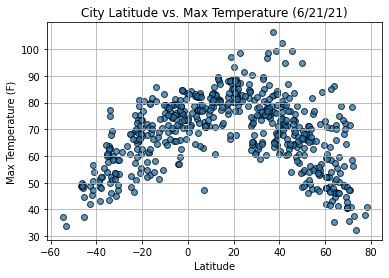

In [8]:
#generate plot of latitude vs max temperature
ax = cities_weather_clean.plot(x = 'Latitude', y = 'Max Temperature', kind = 'scatter', title = 'City Latitude vs. Max Temperature (6/21/21)', grid = True, s = 35, alpha = .75, edgecolor = 'k')

#label y axis
ax.set_ylabel('Max Temperature (F)')

#save, print, and clear plot
plt.savefig("output/images/LatMaxTemp.png")
plt.show()

#### The above plot is illustrating the highest temperature of the day on 6/17/21 at various cities across the globe, compared to that city's distance from the equator. The 0 latitude, near the equator, is showing generally higher temperatures than closer to the poles. This supports the statement that it will typically get colder further from the equator.

### Latitude vs. Humidity Plot

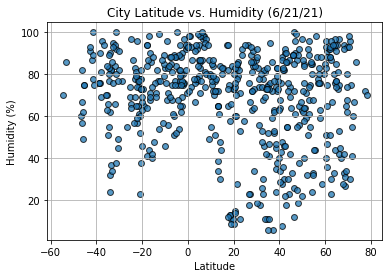

In [9]:
#generate plot of latitude vs humidity
ax = cities_weather_clean.plot(x = 'Latitude', y = 'Humidity', kind = 'scatter', title = 'City Latitude vs. Humidity (6/21/21)', grid = True, s = 35, alpha = .75, edgecolor = 'k')

#label y axis
ax.set_ylabel('Humidity (%)')

#save, print, and clear plot
plt.savefig("output/images/LatHumid.png")
plt.show()

#### The above plot is illustrating the humidity percentage of the day on 6/17/21 at various cities across the globe, compared to that city's distance from the equator.  It seems to be fairly consistently humid at most latitudes on this day.

### Latitude vs. Cloudiness Plot

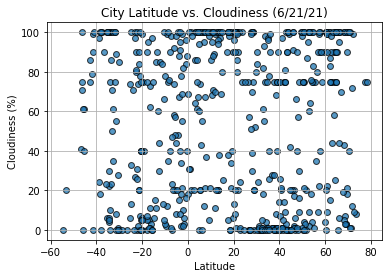

In [10]:
#generate plot of latitude vs cloudiness
ax = cities_weather_clean.plot(x = 'Latitude', y = 'Cloudiness', kind = 'scatter', title = 'City Latitude vs. Cloudiness (6/21/21)', grid = True, s = 35, alpha = .75, edgecolor = 'k')

#label y axis
ax.set_ylabel('Cloudiness (%)')

#save, print, and clear plot
plt.savefig("output/images/LatCloud.png")
plt.show()

#### The above plot is illustrating the cloud cover of the day on 6/17/21 at various cities across the globe, compared to that city's distance from the equator. Latitude does not seem to be a major factor in the percentage of cloud cover.  There does appear to be a tendancy to either be close to full cloud cover, or almost completely clear sky, with fewer locations falling into the partly cloudy percentages.

### Latitude vs. Wind Speed Plot

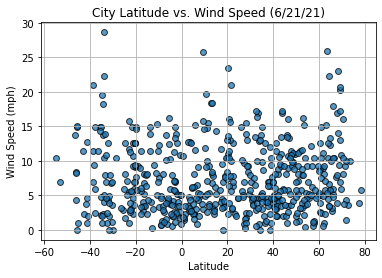

In [11]:
#generate plot of latitude vs wind speed
ax = cities_weather_clean.plot(x = 'Latitude', y = 'Wind Speed', kind = 'scatter', title = 'City Latitude vs. Wind Speed (6/21/21)', grid = True, s = 35, alpha = .75, edgecolor = 'k')

#label y axis
ax.set_ylabel('Wind Speed (mph)')

#save, print, and clear plot
plt.savefig("output/images/LatWind.png")
plt.show()

#### The above plot is illustrating the wind speed collected on 6/17/21 at various cities across the globe, compared to that city's distance from the equator. Latitude does not seem to be a major factor of determining wind speed.  It does appear that most locations have between 0 and 10 mph of winds.

## Linear Regression

In [12]:
north_weather = cities_weather_clean.loc[cities_weather_clean['Latitude'] >= 0, :]
south_weather = cities_weather_clean.loc[cities_weather_clean['Latitude'] < 0, :]

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


The correlation between Latitude and Maximum Temperature in the Northern Hemisphere is -0.6276405282534119



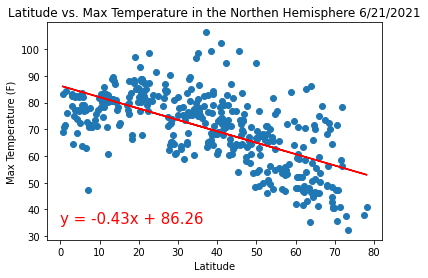

In [13]:
#define x and y values
x_values = north_weather['Latitude']
y_values = north_weather['Max Temperature']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Maximum Temperature in the Northern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (0,35), fontsize=15, color="red")
plt.title('Latitude vs. Max Temperature in the Northen Hemisphere 6/21/2021')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#save, print, and clear plot
plt.savefig("output/images/NorthMaxTemp.png")
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The correlation between Latitude and Maximum Temperature in the Southern Hemisphere is 0.7474728783275637



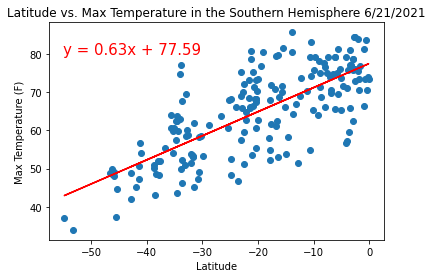

In [14]:
#define x and y values
x_values = south_weather['Latitude']
y_values = south_weather['Max Temperature']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Maximum Temperature in the Southern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (-55,80), fontsize=15, color="red")
plt.title('Latitude vs. Max Temperature in the Southern Hemisphere 6/21/2021')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#save, print, and clear plot
plt.savefig("output/images/SouthMaxTemp.png")
plt.show()

## Temperature Analysis

There is a clear correlation between temperature and latitude. In both the northern and southern hemispheres, as you approach the equator, the trendline will clearly become towards higher temperatures. The southern hemispheres show strong positive association while the northern hemispheres would classify as having weak negative association.

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The correlation between Latitude and Humidity in the Northern Hemisphere is -0.08679888114491141



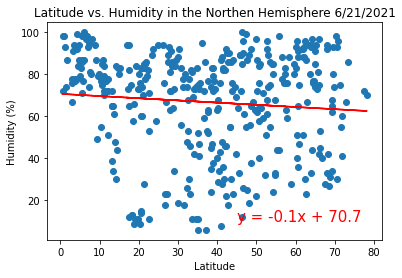

In [15]:
#define x and y values
x_values = north_weather['Latitude']
y_values = north_weather['Humidity']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Humidity in the Northern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (45,10), fontsize=15, color="red")
plt.title('Latitude vs. Humidity in the Northen Hemisphere 6/21/2021')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#save, print, and clear plot
plt.savefig("output/images/NorthHumid.png")
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The correlation between Latitude and Humidity in the Southern Hemisphere is 0.09727944193432365



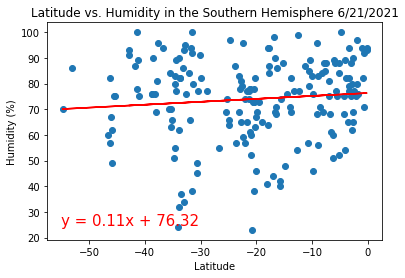

In [16]:
#define x and y values
x_values = south_weather['Latitude']
y_values = south_weather['Humidity']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Humidity in the Southern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (-55,25), fontsize=15, color="red")
plt.title('Latitude vs. Humidity in the Southern Hemisphere 6/21/2021')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#save, print, and clear plot
plt.savefig("output/images/SouthHumid.png")
plt.show()

## Humidity Analysis

There seems to little or no associationIn both the northern and southern hemispheres, as you approach the equator, the trendline remains fairly flat. If anything, this data reflects a slight trend in the southern hemisphere to become lass humid toward the equator.  Both r values are nearer to 0 and support that any trend is very weak.

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The correlation between Latitude and Cloudiness in the Northern Hemisphere is -0.06326107230974895



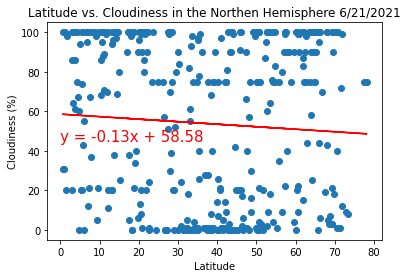

In [17]:
#define x and y values
x_values = north_weather['Latitude']
y_values = north_weather['Cloudiness']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Cloudiness in the Northern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (0, 45), fontsize=15, color="red")
plt.title('Latitude vs. Cloudiness in the Northen Hemisphere 6/21/2021')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#save, print, and clear plot
plt.savefig("output/images/NorthCloud.png")
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The correlation between Latitude and Cloudiness in the Southern Hemisphere is -0.05087774827631899



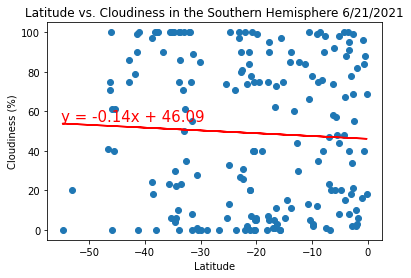

In [18]:
#define x and y values
x_values = south_weather['Latitude']
y_values = south_weather['Cloudiness']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Cloudiness in the Southern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (-55, 55), fontsize=15, color="red")
plt.title('Latitude vs. Cloudiness in the Southern Hemisphere 6/21/2021')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#save, print, and clear plot
plt.savefig("output/images/SouthCloud.png")
plt.show()

## Cloudiness Analysis

There seems to little or no association between cloudiness and latitude. In both the northern and southern hemispheres, as you approach the equator, the trendline remains fairly flat. The r values are very close to 0 and support that any trend is extremely weak.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The correlation between Latitude and Wind Speed in the Northern Hemisphere is 0.08736391050892561



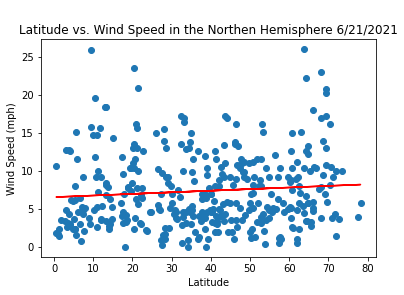

In [19]:
#define x and y values
x_values = north_weather['Latitude']
y_values = north_weather['Wind Speed']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Wind Speed in the Northern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (25, 30), fontsize=15, color="red")
plt.title('Latitude vs. Wind Speed in the Northen Hemisphere 6/21/2021')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#save, print, and clear plot
plt.savefig("output/images/NorthWind.png")
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The correlation between Latitude and Wind Speed in the Southern Hemisphere is -0.18867598664630886



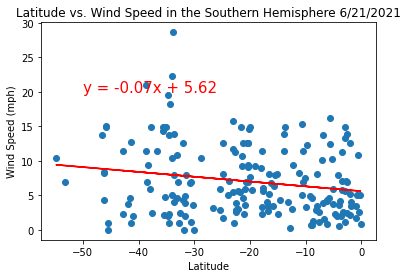

In [20]:
#define x and y values
x_values = south_weather['Latitude']
y_values = south_weather['Wind Speed']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Wind Speed in the Southern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
plt.title('Latitude vs. Wind Speed in the Southern Hemisphere 6/21/2021')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#save, print, and clear plot
plt.savefig("output/images/SouthWind.png")
plt.show()

## Wind Speed Analysis

There seems to little or no association between cloudiness and latitude. In both the northern and southern hemispheres, as you approach the equator, the trendline remains almost completely flat. The r values are very close to 0 and support that there is essentially no trend.